# Student Id: 18203485 

# Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import percentile
import random
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer

In [2]:
CSV_SPLIT = ','

In [3]:
data = pd.read_csv('./data/bank_et2.csv',sep=CSV_SPLIT, delimiter=None,index_col='Unnamed: 0') #For local Machine

# Task 1

# Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [4]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [5]:
imputer = Imputer(missing_values='NaN', strategy='mean')
imputer.fit(data['age'].values.reshape(-1, 1))
data['age'] = imputer.transform(data['age'].values.reshape(-1, 1))

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
data['job'].fillna('unknown', inplace=True)

In [7]:
data['education'].fillna('unknown', inplace=True)

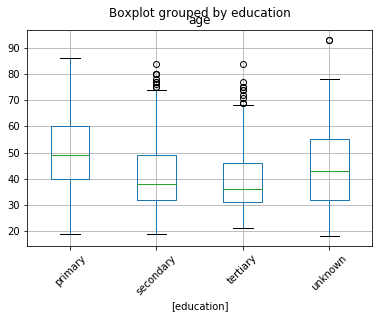

In [8]:
data.boxplot(column='age', by=['education'], rot=45)

In [9]:
data['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [10]:
data['contact'].fillna('unknown', inplace=True)

In [11]:
data['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [12]:
data['poutcome'].fillna('other', inplace=True)

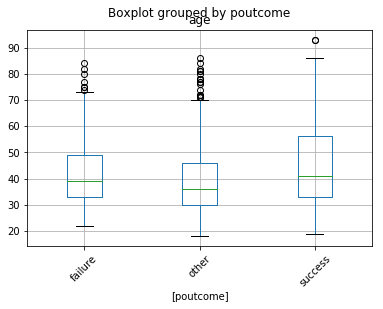

In [13]:
data.boxplot(column='age', by=['poutcome'], rot=45)

In [14]:
data.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.686108,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


# Top 5

In [15]:
data.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


# Bottom 5

In [ ]:
data.tail(5)

# Recheck on empty fields

In [ ]:
data.apply(lambda x: sum(x.isnull()), axis=0)

# Task 1 Comment

The following were the missing values within the dataset
Inputer is being used on age column to fill in missing values
The following fields was replaced by unknown due not knowing any other ways to classify them.
These fields are : job 10 , education 104 , contact 191 , poutcome 454
There were other ways to approach this such as Deleting large number of rows where the NaN is present but this wouldnt make the dataset equal by droping those rows.
For a large number of numerical categories median could be used to fill in its missing values as a quick way to handle the column.
I chose to assign a unique category to job, education , contact , poutcome it will result in lower variance with one hot encoding and negates the loss of data as a new category has been added.
It inadvertanetly add variance to the data that may affect the performance of the chosen algorithm not unless KNN which can handle missing values.


In [ ]:
f, ax = plt.subplots(figsize=(20, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Task 2

Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.